# Heart Disease Prediction using Supervised Machine Learning (KNN)
**Description:** This project builds a classifier to predict heart disease based on patient clinical data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [7]:
df = pd.read_csv('heart.csv')
df.head() #show1strows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
import numpy as np
import pandas as pd

# --- Step 1: Drop impossible values ---
# Remove rows where RestingBP or Cholesterol are zero
df = df[(df['RestingBP'] != 0) & (df['Cholesterol'] != 0)]

# --- Step 2: Handle negative values in Oldpeak ---
# Replace negative Oldpeak values with median of the column
# (median is better than 0 because it preserves distribution)
median_oldpeak = df['Oldpeak'].median()
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: median_oldpeak if x < 0 else x)

# --- Step 3: Check for any remaining missing values ---
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.902413,1.072334,0.0,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# --- Step 1: One-hot encode categorical features ---
encoder = OneHotEncoder(sparse_output=False)  # keep all categories
X_cat = encoder.fit_transform(df[categorical_features])

# Get new feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert to DataFrame
X_cat_df = pd.DataFrame(X_cat, columns=encoded_feature_names, index=df.index)

# --- Step 2: Drop original categorical features & merge with numerical ---
df_encoded = pd.concat([df.drop(columns=categorical_features), X_cat_df], axis=1)

# --- Step 3: Display new feature columns ---
print("Features after one-hot encoding:")
print(df_encoded.columns.tolist())


Features after one-hot encoding:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


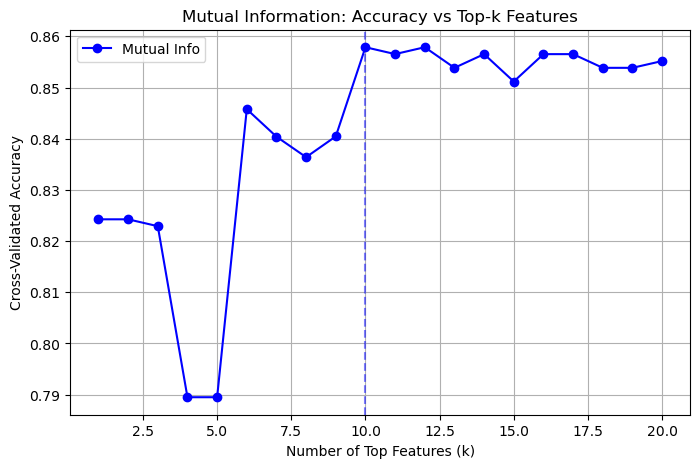

=== Top Features by Mutual Information ===


,Feature,Mutual Info Score
0,ST_Slope_Up,0.231177
1,ST_Slope_Flat,0.173390
2,ExerciseAngina_N,0.159097
3,Oldpeak,0.157338
4,ExerciseAngina_Y,0.152607
5,ChestPainType_ASY,0.136098
6,ChestPainType_ATA,0.089734
7,MaxHR,0.078396
8,Age,0.068092
9,Sex_F,0.039280


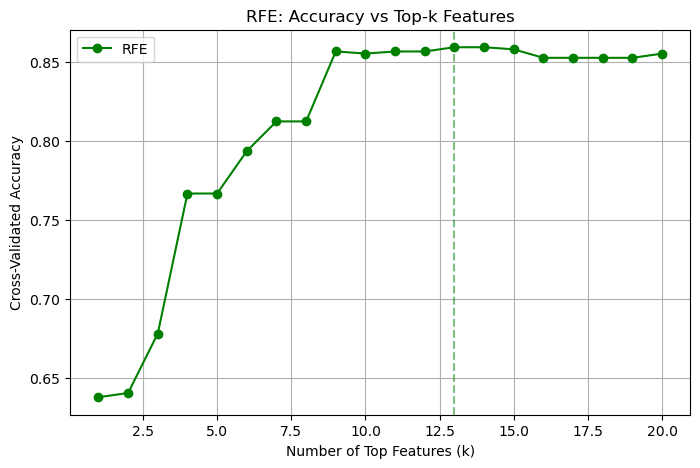

=== Top Features by RFE ===


,Feature,RFE Rank
0,Age,1
1,RestingBP,1
2,Sex_F,1
3,Oldpeak,1
4,Sex_M,1
5,ChestPainType_ASY,1
6,ExerciseAngina_N,1
7,ExerciseAngina_Y,1
8,ST_Slope_Flat,1
9,ST_Slope_Up,1


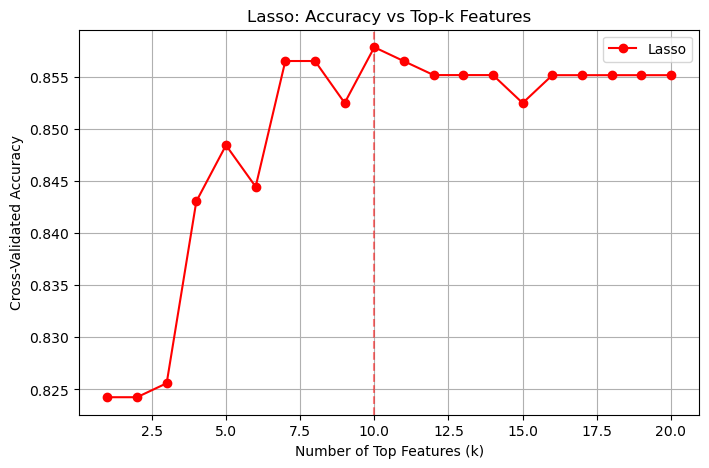

=== Top Features by Lasso ===


,Feature,Lasso Coefficient
0,ST_Slope_Up,0.120771
1,ChestPainType_ASY,0.104898
2,ST_Slope_Flat,0.076036
3,Sex_F,0.075841
4,ExerciseAngina_N,0.072439
5,Oldpeak,0.053734
6,Age,0.029430
7,RestingBP,0.014849
8,FastingBS,0.014420
9,Cholesterol,0.011890



=== Feature Selection Method Accuracies ===
Mutual Info: 0.8579
RFE: 0.8592
Lasso: 0.8579

=== Best Feature Selection Method ===
Method: RFE, Accuracy=0.8592


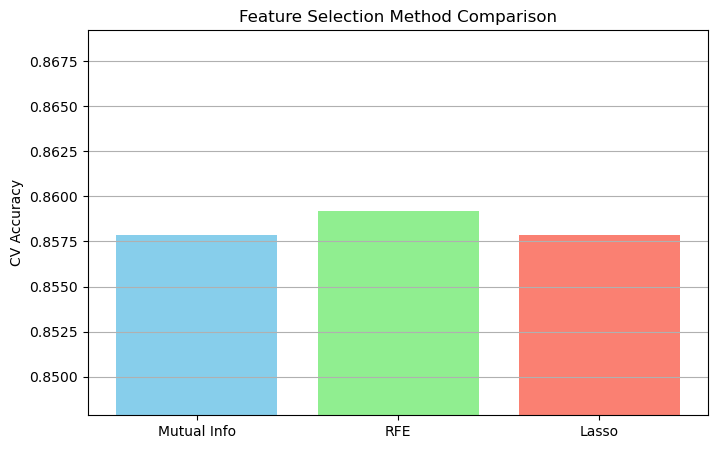

=== Combined Feature Table ===


,Feature,Mutual Info,RFE Rank,Lasso Coef
19,ST_Slope_Up,0.231177,1,1.207715e-01
18,ST_Slope_Flat,0.173390,1,7.603551e-02
15,ExerciseAngina_N,0.159097,1,7.243937e-02
5,Oldpeak,0.157338,1,5.373415e-02
16,ExerciseAngina_Y,0.152607,1,0.000000e+00
8,ChestPainType_ASY,0.136098,1,1.048976e-01
9,ChestPainType_ATA,0.089734,3,0.000000e+00
4,MaxHR,0.078396,11,2.760449e-03
0,Age,0.068092,1,2.943013e-02
6,Sex_F,0.039280,1,7.584138e-02


=== Final Selected Features Based on Best Method ===


,Selected Features
0,Age
1,RestingBP
2,Sex_F
3,Oldpeak
4,Sex_M
5,ChestPainType_ASY
6,ExerciseAngina_N
7,ExerciseAngina_Y
8,ST_Slope_Flat
9,ST_Slope_Up


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import mutual_info_classif, RFE

# =========================
# Prepare Data
# =========================
X = df_encoded.drop('HeartDisease', axis=1).values
y = df_encoded['HeartDisease'].values
feature_names = df_encoded.drop('HeartDisease', axis=1).columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base model for RFE and cross-validation
model = LogisticRegression(max_iter=1000, solver='liblinear')
k_values = range(1, X.shape[1]+1)

# =========================
# 1. Mutual Information
# =========================
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
mi_series = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)

mi_accuracies = []
for k in k_values:
    top_features = mi_series.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    mi_accuracies.append(np.mean(cv_scores))

best_k_mi = k_values[np.argmax(mi_accuracies)]
mi_best_acc = max(mi_accuracies)
mi_top_features = mi_series.index[:best_k_mi]

# Plot MI accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, mi_accuracies, marker='o', color='blue', label='Mutual Info')
plt.axvline(best_k_mi, color='blue', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Mutual Information: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# MI Feature Table
df_mi = pd.DataFrame({
    "Feature": mi_top_features,
    "Mutual Info Score": mi_series[mi_top_features].values
})
df_mi = df_mi.sort_values(by="Mutual Info Score", ascending=False)
print("=== Top Features by Mutual Information ===")
display(df_mi)

# =========================
# 2. RFE
# =========================
rfe_model = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=None)
rfe.fit(X_scaled, y)
rfe_ranking = pd.Series(rfe.ranking_, index=feature_names).sort_values()

rfe_accuracies = []
for k in k_values:
    top_features = rfe_ranking.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    rfe_accuracies.append(np.mean(cv_scores))

best_k_rfe = k_values[np.argmax(rfe_accuracies)]
rfe_best_acc = max(rfe_accuracies)
rfe_top_features = rfe_ranking.index[:best_k_rfe]

# Plot RFE accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, rfe_accuracies, marker='o', color='green', label='RFE')
plt.axvline(best_k_rfe, color='green', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("RFE: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# RFE Feature Table
df_rfe = pd.DataFrame({
    "Feature": rfe_top_features,
    "RFE Rank": rfe_ranking[rfe_top_features].values
})
df_rfe = df_rfe.sort_values(by="RFE Rank")
print("=== Top Features by RFE ===")
display(df_rfe)

# =========================
# 3. Lasso
# =========================
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
lasso_coeff = pd.Series(np.abs(lasso.coef_), index=feature_names).sort_values(ascending=False)

lasso_accuracies = []
for k in k_values:
    top_features = lasso_coeff.index[:k]
    idx = [feature_names.get_loc(f) for f in top_features]
    X_sel = X_scaled[:, idx]
    cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='accuracy')
    lasso_accuracies.append(np.mean(cv_scores))

best_k_lasso = k_values[np.argmax(lasso_accuracies)]
lasso_best_acc = max(lasso_accuracies)
lasso_top_features = lasso_coeff.index[:best_k_lasso]

# Plot Lasso accuracy vs top-k features
plt.figure(figsize=(8,5))
plt.plot(k_values, lasso_accuracies, marker='o', color='red', label='Lasso')
plt.axvline(best_k_lasso, color='red', linestyle='--', alpha=0.5)
plt.xlabel("Number of Top Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Lasso: Accuracy vs Top-k Features")
plt.grid(True)
plt.legend()
plt.show()

# Lasso Feature Table
df_lasso = pd.DataFrame({
    "Feature": lasso_top_features,
    "Lasso Coefficient": lasso_coeff[lasso_top_features].values
})
df_lasso = df_lasso.sort_values(by="Lasso Coefficient", ascending=False)
print("=== Top Features by Lasso ===")
display(df_lasso)

# =========================
# 4. Compare Feature Selection Methods
# =========================
methods_acc = {
    "Mutual Info": mi_best_acc,
    "RFE": rfe_best_acc,
    "Lasso": lasso_best_acc
}

# =========================
# 4a. Print Method Accuracies
# =========================
print("\n=== Feature Selection Method Accuracies ===")
for method, acc in methods_acc.items():
    print(f"{method}: {acc:.4f}")

best_method = max(methods_acc, key=methods_acc.get)
print("\n=== Best Feature Selection Method ===")
print(f"Method: {best_method}, Accuracy={methods_acc[best_method]:.4f}")

# Histogram comparison
acc_values = list(methods_acc.values())
y_min = min(acc_values) - 0.01
y_max = max(acc_values) + 0.01

plt.figure(figsize=(8,5))
plt.bar(methods_acc.keys(), methods_acc.values(), color=['skyblue','lightgreen','salmon'])
plt.ylabel("CV Accuracy")
plt.title("Feature Selection Method Comparison")
plt.ylim(y_min, y_max)
plt.grid(axis='y')
plt.show()

# =========================
# 5. Combined Feature Table
# =========================
df_combined = pd.DataFrame({
    "Feature": feature_names
})
df_combined["Mutual Info"] = df_combined["Feature"].map(mi_series)
df_combined["RFE Rank"] = df_combined["Feature"].map(rfe_ranking)
df_combined["Lasso Coef"] = df_combined["Feature"].map(lasso_coeff)
df_combined = df_combined.sort_values(by="Mutual Info", ascending=False)

print("=== Combined Feature Table ===")
display(df_combined)

# =========================
# Store final selected features
# =========================
if best_method == "Mutual Info":
    final_features = list(mi_top_features)
elif best_method == "RFE":
    final_features = list(rfe_top_features)
elif best_method == "Lasso":
    final_features = list(lasso_top_features)

# =========================
# Display final selected features in a table
# =========================
df_final_features = pd.DataFrame({
    "Selected Features": final_features
})

print("=== Final Selected Features Based on Best Method ===")
display(df_final_features)



In [14]:
# Get the indices of the final selected features
selected_idx = [feature_names.get_loc(f) for f in final_features]

# Prepare X with only the best features
X_best = X_scaled[:, selected_idx]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_best, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(522, 13) (224, 13) (522,) (224,)


In [15]:
# Scale your data
scaler_selected = StandardScaler()
X_scaled = scaler_selected.fit_transform(X_best)   # X_best = only selected features

**KNN Hyperparameter tuning (Function to find the best settings for a model using cross-validation to improve accuracy)** 

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=5):
    
    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Grid search for best hyperparameters
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit model
    clf_grid.fit(X_train, y_train)

    # Extract best model and parameters
    best_model = clf_grid.best_estimator_
    best_params = clf_grid.best_params_

    return best_model, best_params


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Define your classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30, 40],
}

# Call the tuning function
best_knn_model, best_knn_params = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

print("Best KNN Parameters:", best_knn_params)


Best KNN Parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


Testing n_splits = 3
Best CV Accuracy: 0.8793

Testing n_splits = 5
Best CV Accuracy: 0.8774

Testing n_splits = 7
Best CV Accuracy: 0.8775

Testing n_splits = 10
Best CV Accuracy: 0.8813



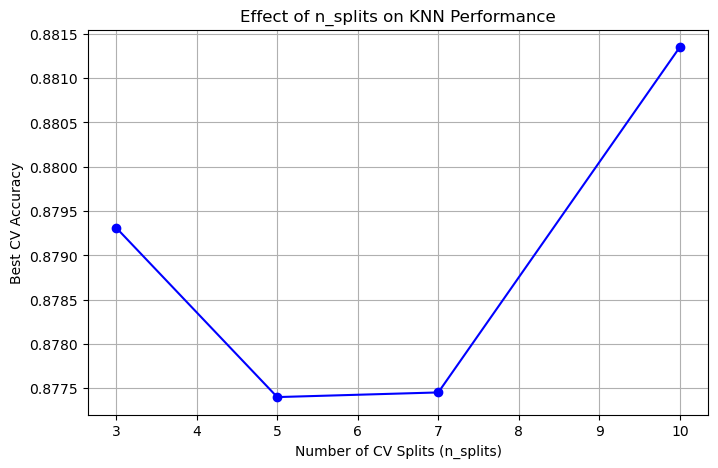

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define your classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30, 40],
}

# Different CV splits to test
n_splits_list = [3, 5, 7, 10]
best_scores = []

for n_splits in n_splits_list:
    print(f"Testing n_splits = {n_splits}")
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    grid = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_scores.append(grid.best_score_)
    print(f"Best CV Accuracy: {grid.best_score_:.4f}\n")

# Plot the effect of n_splits
plt.figure(figsize=(8,5))
plt.plot(n_splits_list, best_scores, marker='o', color='blue')
plt.xlabel("Number of CV Splits (n_splits)")
plt.ylabel("Best CV Accuracy")
plt.title("Effect of n_splits on KNN Performance")
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import classification_report

#Evaluate the optimized model on the trained data
print(classification_report(y_train, best_knn_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       249

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



In [20]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = best_knn_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of Best KNN Model: {train_accuracy:.4f}")

# Predict on test data
y_test_pred = best_knn_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of Best KNN Model: {test_accuracy:.4f}")


Training Accuracy of Best KNN Model: 1.0000
Test Accuracy of Best KNN Model: 0.8750


In [21]:
from sklearn.metrics import classification_report

# Display precision, recall, F1-score, and support for each class on the test set
print(classification_report(y_test, best_knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       117
           1       0.85      0.90      0.87       107

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.87       224
weighted avg       0.88      0.88      0.88       224



In [22]:
from sklearn.metrics import classification_report
import pandas as pd

# Predict on test set
y_pred = best_knn_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for a nicer tabular view
df_knn_report = pd.DataFrame(report).transpose()

# Round metrics for readability
df_knn_report = df_knn_report.round(2)

# Add a column to indicate model name
df_knn_report.insert(0, "Model", "KNN")

# Optional: highlight Accuracy row for clarity
df_knn_report.style.background_gradient(cmap="Blues", subset=["precision", "recall", "f1-score"])


,Model,precision,recall,f1-score,support
0,KNN,0.900000,0.850000,0.880000,117.000000
1,KNN,0.850000,0.900000,0.870000,107.000000
accuracy,KNN,0.880000,0.880000,0.880000,0.880000
macro avg,KNN,0.880000,0.880000,0.870000,224.000000
weighted avg,KNN,0.880000,0.880000,0.880000,224.000000


| Metric        | Class 0 (No Disease) | Class 1 (Disease) | Explanation                                                                                  |
| ------------- | -------------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| **Precision** | 0.89                 | 0.93              | Out of all predicted as class X, how many were correct? <br>High = low false positives       |
| **Recall**    | 0.93                 | 0.90              | Out of all actual class X, how many did we correctly predict? <br>High = low false negatives |
| **F1-score**  | 0.91                 | 0.92              | Harmonic mean of precision & recall <br>Good balance between the two                         |
| **Support**   | 71                   | 79                | Actual number of samples in each class in the test set                                       |

**Accuracy = 0.91**

- Overall, 91% of predictions were correct (both class 0 and 1).

**Macro avg = Precision: 0.91, Recall: 0.91, F1: 0.91**

- Equal weight to each class regardless of sample size.

**Weighted avg = Precision: 0.91, Recall: 0.91, F1: 0.91**

- Average weighted by support (number of true samples per class)

- Reflects the actual class distribution.

**Summary of Interpretation:**
- Class 0 (No disease):

    - Recall = 0.93 → The model correctly identifies 93% of healthy patients.

    - Precision = 0.89 → When predicting no disease, it's correct 0.89% of the time.

- Class 1 (Disease):

    - Recall = 0.90 → The model correctly identifies 90% of patients with heart disease.

    - Precision = 0.93 → When predicting disease, it's correct 93% of the time.

- Balanced performance:

    - High scores for both precision and recall in both classes.

    - Indicates low false positives and false negatives — important in medical diagnostics.

- High F1-score:

    - F1-scores around 0.91 mean the model performs very well overall.

    - This balance is critical for medical decisions where both types of errors have consequences.

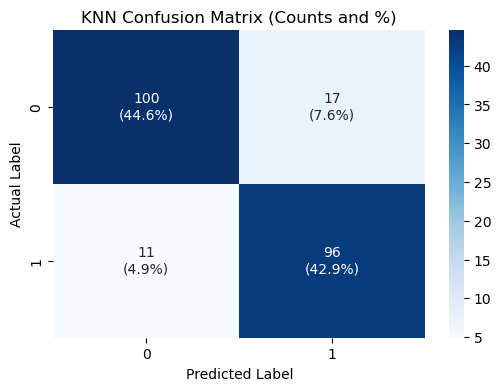

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm / cm.sum() * 100  # Total percentage out of all samples

# Create labels with both count and percentage
labels = np.array([[f"{count}\n({percent:.1f}%)" for count, percent in zip(row_c, row_p)] 
                   for row_c, row_p in zip(cm, cm_percent)])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("KNN Confusion Matrix (Counts and %)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

|               | **Predicted: 0** | **Predicted: 1** |
| ------------- | ---------------- | ---------------- |
| **Actual: 0** | 100 (TN) – 44.6%  | 17 (FP) – 7.6%    |
| **Actual: 1** | 11 (FN) – 4.9%    | 96 (TP) – 42.9%  |


True Negatives (TN) = 100: No disease predicted correctly

False Positives (FP) = 17: No disease predicted as disease

False Negatives (FN) = 11: Disease cases missed by the model

True Positives (TP) = 96: Disease predicted correctly

This means:
- 96 (42.9%) people with heart disease were correctly identified ✅
- 11 (4.9%) heart disease cases were missed ❌
- 100 (44.6%) healthy people were correctly identified ✅
- 17 (7.6%) healthy people were wrongly predicted to have heart disease ❌

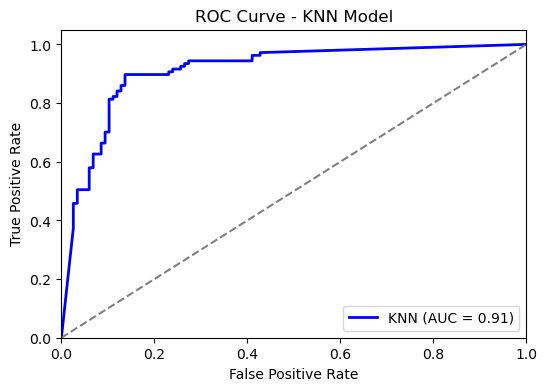

In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get probability estimates for the positive class
y_prob = best_knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Model")
plt.legend(loc="lower right")
plt.show()

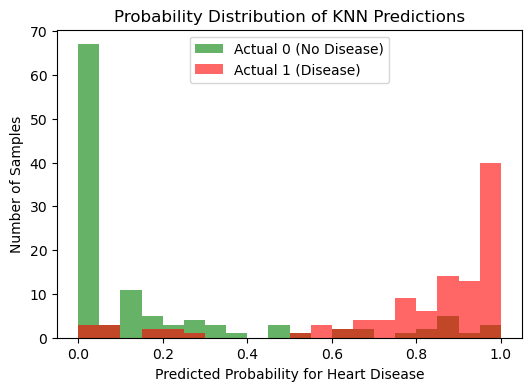

In [25]:
# Plot probability histogram for the positive class
plt.figure(figsize=(6, 4))
plt.hist(y_prob[y_test == 0], bins=20, alpha=0.6, color='green', label='Actual 0 (No Disease)')
plt.hist(y_prob[y_test == 1], bins=20, alpha=0.6, color='red', label='Actual 1 (Disease)')
plt.xlabel("Predicted Probability for Heart Disease")
plt.ylabel("Number of Samples")
plt.title("Probability Distribution of KNN Predictions")
plt.legend(loc="upper center")
plt.show()


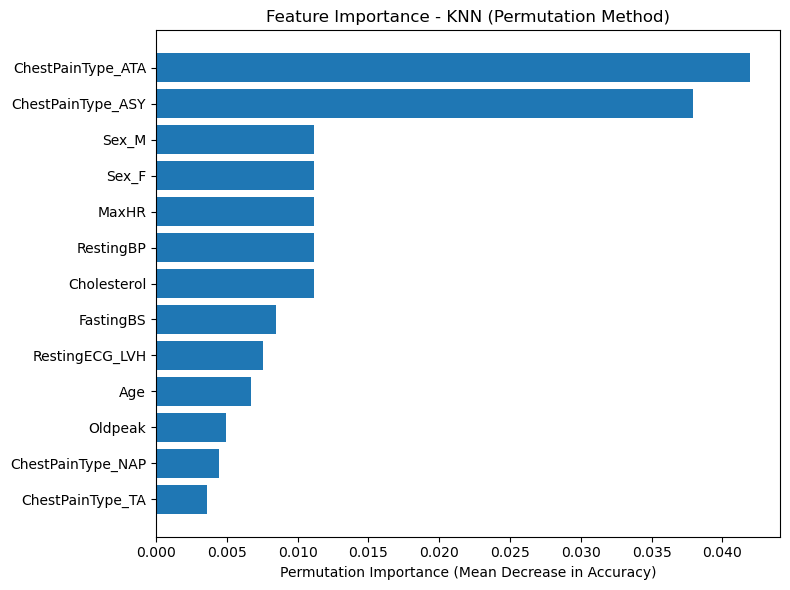

=== Permutation Feature Importance (KNN) ===


,Feature,Importance Mean,Importance Std
12,ChestPainType_ATA,0.041964,0.010788
11,ChestPainType_ASY,0.037946,0.010032
9,Sex_F,0.011161,0.006392
10,Sex_M,0.011161,0.006392
7,RestingBP,0.011161,0.006696
6,Cholesterol,0.011161,0.005376
8,MaxHR,0.011161,0.005376
5,FastingBS,0.008482,0.010072
4,RestingECG_LVH,0.007589,0.006930
3,Age,0.006696,0.002995


In [26]:
from sklearn.inspection import permutation_importance

# --- Use feature names from df_encoded ---
feature_names = df_encoded.drop('HeartDisease', axis=1).columns

# --- Permutation importance on test set ---
result = permutation_importance(
    best_knn_model, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# --- Sort by importance ---
sorted_idx = result.importances_mean.argsort()

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (Mean Decrease in Accuracy)")
plt.title("Feature Importance - KNN (Permutation Method)")
plt.tight_layout()
plt.show()

# --- Optional: create a DataFrame of importance scores ---
df_perm_importance = pd.DataFrame({
    "Feature": np.array(feature_names)[sorted_idx],
    "Importance Mean": result.importances_mean[sorted_idx],
    "Importance Std": result.importances_std[sorted_idx]
}).sort_values(by="Importance Mean", ascending=False)

print("=== Permutation Feature Importance (KNN) ===")
display(df_perm_importance)


**RANDOM FOREST Hyperparameter tuning (Function to find the best settings for a model using cross-validation to improve accuracy)** 

In [27]:
# --- Random Forest Model ---
def rf_tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    
    # Cross-validation strategy: maintains class balance in each fold
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Grid search for best hyperparameters
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit model
    clf_grid.fit(X_train, y_train)

    # Extract best model and parameters
    best_model = clf_grid.best_estimator_
    best_params = clf_grid.best_params_

    return best_model, best_params

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Define your classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Call the tuning function
best_rf_model, best_rf_params = rf_tune_clf_hyperparameters(rf_model, param_grid, X_train, y_train)

print("Best Random Forest Parameters:", best_rf_params)

Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [29]:
# Predict on test data using the best tuned model
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Best Random Forest Model: {accuracy:.4f}")
# Print out the classification_report
print(classification_report(y_test, y_pred))

Test Accuracy of Best Random Forest Model: 0.8705
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.85      0.89      0.87       107

    accuracy                           0.87       224
   macro avg       0.87      0.87      0.87       224
weighted avg       0.87      0.87      0.87       224



**SVM Hyperparameter tuning (Function to find the best settings for a model using cross-validation to improve accuracy)** 

In [ ]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # needed to enable HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix


def tune_and_evaluate_svm(X_train, y_train, X_test, y_test, scoring='recall', n_splits=5):
    """
    Tunes hyperparameters for an SVM classifier using HalvingGridSearchCV.
    Returns the best model, best parameters, and evaluation results.
    """
    # Classifier
    svm = SVC(class_weight="balanced", probability=True, random_state=42)

    # Parameter grid
    param_grid = [
        {   # Linear kernel
            'kernel': ['linear'],
            'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]
        },
        {   # RBF kernel
            'kernel': ['rbf'],
            'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3],
            'gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1, 1, 10]
        },
        {   # Polynomial kernel
            'kernel': ['poly'],
            'C': [1e-3, 1e-2, 1e-1, 1, 10, 100],
            'gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1],
            'degree': [2, 3, 4]
        },
        {   # Sigmoid kernel
            'kernel': ['sigmoid'],
            'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3],
            'gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1, 1]
        }
    ]

    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # HalvingGridSearch
    search = HalvingGridSearchCV(
        svm,
        param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        factor=2,   # controls aggressiveness of resource allocation
        verbose=1
    )

    # Fit search
    search.fit(X_train, y_train)

    # Best model & params
    best_model = search.best_estimator_
    best_params = search.best_params_

    print("Best SVM Parameters:", best_params)

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return best_model, best_params


# ---- Run it ----
best_svm_model, best_svm_params = tune_and_evaluate_svm(X_train, y_train, X_test, y_test)


===== Best SVM Parameters =====
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Test Accuracy: 0.8705

===== Classification Report =====
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       117
           1       0.84      0.90      0.87       107

    accuracy                           0.87       224
   macro avg       0.87      0.87      0.87       224
weighted avg       0.87      0.87      0.87       224



In [37]:
import customtkinter as ctk
from PIL import Image, ImageTk
import numpy as np
from tkinter import messagebox
from sklearn.preprocessing import StandardScaler

ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("blue")


class HeartDiseasePredictor:
    def __init__(self, knn_model=None, rf_model=None, svm_model=None, scaler=None):
        self.window = ctk.CTk()
        self.window.title("❤️ Heart Disease Prediction System")
        self.window.geometry("1100x950")
        self.window.resizable(True, True)
        
        # Enhanced color scheme for heart theme
        self.heart_colors = {
            "primary_red": "#FF4757",
            "secondary_red": "#FF3838",
            "dark_red": "#C44569",
            "light_red": "#FF6B7A",
            "pulse_red": "#FF5722",
            "bg_dark": "#1A1A2E",
            "bg_medium": "#16213E",
            "bg_light": "#0F3460",
            "accent_pink": "#FF6B9D",
            "text_light": "#F1F2F6"
        }
        
        # Configure window background
        self.window.configure(fg_color=self.heart_colors["bg_dark"])

        self.models = {
            "K-Nearest Neighbors": knn_model,
            "Random Forest": rf_model,
            "SVM": svm_model
        }
        self.current_model = "K-Nearest Neighbors"
        self.scaler = scaler if scaler is not None else StandardScaler()

        self._create_ui()

    def _create_ui(self):
        # Main frame with heart-themed gradient effect
        main_frame = ctk.CTkFrame(
            self.window, 
            fg_color=self.heart_colors["bg_medium"],
            corner_radius=20,
            border_width=2,
            border_color=self.heart_colors["primary_red"]
        )
        main_frame.pack(fill="both", expand=True, padx=20, pady=20)

        # ----- ENHANCED HEADER -----
        header_frame = ctk.CTkFrame(
            main_frame, 
            fg_color=self.heart_colors["bg_light"],
            corner_radius=15,
            border_width=3,
            border_color=self.heart_colors["pulse_red"],
            height=120
        )
        header_frame.pack(fill="x", pady=(0, 25), ipady=15)

        # Heart image with enhanced styling
        try:
            image = Image.open("heartpredicticon.png")
            image = image.resize((100, 100), Image.ANTIALIAS)
            self.heart_img = ImageTk.PhotoImage(image)
            img_label = ctk.CTkLabel(header_frame, image=self.heart_img, text="")
            img_label.pack(side="left", padx=25)
        except:
            # Fallback heart emoji with styling
            heart_emoji_label = ctk.CTkLabel(
                header_frame,
                text="💖",
                font=ctk.CTkFont(size=80),
                fg_color="transparent"
            )
            heart_emoji_label.pack(side="left", padx=25)

        # Enhanced title with pulse effect styling
        title_label = ctk.CTkLabel(
            header_frame,
            text="💗 CardioGuard AI Predictor 💗",
            font=ctk.CTkFont(size=36, weight="bold"),
            text_color=self.heart_colors["primary_red"]
        )
        title_label.pack(side="left", padx=15)

        subtitle_label = ctk.CTkLabel(
            header_frame,
            text="🩺 Advanced Heart Health Risk Assessment System 🩺",
            font=ctk.CTkFont(size=18, weight="bold"),
            text_color=self.heart_colors["accent_pink"]
        )
        subtitle_label.pack(side="left", padx=15)

        # Enhanced help button
        help_button = ctk.CTkButton(
            header_frame,
            text="❓ Help",
            width=90,
            height=40,
            font=ctk.CTkFont(size=14, weight="bold"),
            fg_color=self.heart_colors["dark_red"],
            hover_color=self.heart_colors["secondary_red"],
            border_width=2,
            border_color=self.heart_colors["light_red"],
            corner_radius=20,
            command=self._show_help
        )
        help_button.pack(side="right", padx=25)

        # ----- ENHANCED INPUT SECTION -----
        self.scrollable_frame = ctk.CTkScrollableFrame(
            main_frame,
            corner_radius=15,
            fg_color=self.heart_colors["bg_light"],
            border_width=2,
            border_color=self.heart_colors["primary_red"],
            scrollbar_button_color=self.heart_colors["pulse_red"],
            scrollbar_button_hover_color=self.heart_colors["light_red"]
        )
        self.scrollable_frame.pack(fill="both", expand=True, padx=15, pady=(0, 25))

        # Heart health icon header for inputs
        input_header = ctk.CTkFrame(
            self.scrollable_frame,
            fg_color=self.heart_colors["bg_medium"],
            corner_radius=10,
            border_width=1,
            border_color=self.heart_colors["pulse_red"]
        )
        input_header.pack(fill="x", pady=(0, 20))
        
        input_title = ctk.CTkLabel(
            input_header,
            text="💓 Enter Your Health Information 💓",
            font=ctk.CTkFont(size=22, weight="bold"),
            text_color=self.heart_colors["primary_red"]
        )
        input_title.pack(pady=15)

        # Optional small heart icons
        try:
            img = Image.open("heart_small.png").resize((60, 60), Image.ANTIALIAS)
            self.input_heart_img = ImageTk.PhotoImage(img)
            img_label = ctk.CTkLabel(self.scrollable_frame, image=self.input_heart_img, text="")
            img_label.pack(pady=10)
        except:
            heart_decoration = ctk.CTkLabel(
                self.scrollable_frame,
                text="💖 🩺 💖",
                font=ctk.CTkFont(size=24),
                text_color=self.heart_colors["accent_pink"]
            )
            heart_decoration.pack(pady=10)

        self._create_input_fields()

        # ----- ENHANCED RESULT SECTION -----
        result_frame = ctk.CTkFrame(
            main_frame,
            fg_color=self.heart_colors["bg_medium"],
            corner_radius=15,
            border_width=2,
            border_color=self.heart_colors["primary_red"]
        )
        result_frame.pack(fill="x", padx=15, pady=(0, 10))

        # Result label with heart theme
        self.results_label = ctk.CTkLabel(
            result_frame,
            text="💗 Ready for Analysis! Enter your health data and click 'Analyze Heart Risk' 💗",
            font=ctk.CTkFont(size=18, weight="bold"),
            wraplength=950,
            text_color=self.heart_colors["text_light"]
        )
        self.results_label.pack(pady=20)

        # ----- ENHANCED PREDICTION SECTION -----
        pred_frame = ctk.CTkFrame(
            main_frame, 
            corner_radius=15, 
            fg_color=self.heart_colors["bg_light"],
            border_width=3,
            border_color=self.heart_colors["pulse_red"]
        )
        pred_frame.pack(fill="x", padx=15, pady=25, before=result_frame)

        # Model selector with heart theme
        model_label = ctk.CTkLabel(
            pred_frame,
            text="🤖 AI Model:",
            font=ctk.CTkFont(size=16, weight="bold"),
            text_color=self.heart_colors["accent_pink"]
        )
        model_label.pack(side="left", padx=(25, 10), pady=25)

        self.model_selector = ctk.CTkOptionMenu(
            pred_frame,
            values=list(self.models.keys()),
            command=self._on_model_change,
            fg_color=self.heart_colors["dark_red"],
            button_color=self.heart_colors["primary_red"],
            button_hover_color=self.heart_colors["light_red"],
            dropdown_fg_color=self.heart_colors["bg_medium"],
            dropdown_hover_color=self.heart_colors["pulse_red"],
            font=ctk.CTkFont(size=14, weight="bold"),
            width=200,
            height=35
        )
        self.model_selector.set(self.current_model)
        self.model_selector.pack(side="left", padx=15, pady=25)

        # Enhanced predict button
        self.predict_button = ctk.CTkButton(
            pred_frame,
            text="🔍 Analyze Heart Risk 💓",
            height=55,
            width=220,
            font=ctk.CTkFont(size=18, weight="bold"),
            fg_color=self.heart_colors["primary_red"],
            hover_color=self.heart_colors["secondary_red"],
            border_width=3,
            border_color=self.heart_colors["light_red"],
            corner_radius=25,
            command=self._predict
        )
        self.predict_button.pack(side="right", padx=25, pady=25)

    # ----- ENHANCED INPUT FIELDS -----
    def _create_input_fields(self):
        self.input_fields = {
            "age": {"label": "🎂 Age", "type": "entry", "default": "50"},
            "resting_bp": {"label": "🩺 Blood Pressure", "type": "entry", "default": "120"},
            "cholesterol": {"label": "🧪 Cholesterol (mg/dL)", "type": "entry", "default": "200"},
            "sex": {"label": "👤 Gender", "type": "option", "values": ["Male", "Female"], "default": "Male"},
            "oldpeak": {"label": "📊 Heart Stress Score", "type": "entry", "default": "0.0"},
            "chest_pain_type": {"label": "🫀 Chest Pain Type", "type": "option",
                                "values": ["No Symptoms (ASY)", "Unusual Chest Pain (ATA)", "Not Heart-Related Pain (NAP)"],
                                "default": "No Symptoms (ASY)"},
            "exercise_angina": {"label": "💔 Chest Pain During Exercise", "type": "option",
                                "values": ["No Pain", "Yes, I Get Pain"], "default": "No Pain"},
            "st_slope": {"label": "📈 ST Segment Change", "type": "option",
                         "values": ["Getting Better (Up)", "Staying Same (Flat)"], "default": "Getting Better (Up)"},
            "max_hr": {"label": "💓 Maximum Heart Rate", "type": "entry", "default": "150"}
        }

        self.input_widgets = {}
        fields = list(self.input_fields.items())
        mid_point = len(fields) // 2
        
        # Enhanced left and right frames
        left_frame = ctk.CTkFrame(
            self.scrollable_frame, 
            fg_color=self.heart_colors["bg_medium"],
            corner_radius=12,
            border_width=1,
            border_color=self.heart_colors["pulse_red"]
        )
        left_frame.pack(side="left", fill="both", expand=True, padx=(0, 15))
        
        right_frame = ctk.CTkFrame(
            self.scrollable_frame, 
            fg_color=self.heart_colors["bg_medium"],
            corner_radius=12,
            border_width=1,
            border_color=self.heart_colors["pulse_red"]
        )
        right_frame.pack(side="right", fill="both", expand=True, padx=(15, 0))
        
        fields = list(self.input_fields.items())
        mid_point = len(fields) // 2

        for i, (field_name, field_info) in enumerate(fields):
            parent_frame = left_frame if i < mid_point else right_frame
            
            # Enhanced field container with heart theme
            field_container = ctk.CTkFrame(
                parent_frame, 
                corner_radius=10, 
                fg_color=self.heart_colors["bg_dark"],
                border_width=2,
                border_color=self.heart_colors["dark_red"]
            )
            field_container.pack(fill="x", padx=15, pady=12)

            # Enhanced label with ranking and heart styling
            label = ctk.CTkLabel(
                field_container,
                text=f"💗 {field_info['label']}",
                font=ctk.CTkFont(size=15, weight="bold"),
                text_color=self.heart_colors["accent_pink"]
            )
            label.pack(anchor="w", padx=15, pady=(12, 8))

            # Enhanced input widgets
            if field_info['type'] == 'entry':
                widget = ctk.CTkEntry(
                    field_container, 
                    placeholder_text=field_info['default'],
                    font=ctk.CTkFont(size=14),
                    fg_color=self.heart_colors["bg_medium"],
                    border_color=self.heart_colors["pulse_red"],
                    text_color=self.heart_colors["text_light"],
                    height=35
                )
                widget.insert(0, field_info['default'])
            else:
                widget = ctk.CTkOptionMenu(
                    field_container, 
                    values=field_info['values'],
                    font=ctk.CTkFont(size=14),
                    fg_color=self.heart_colors["dark_red"],
                    button_color=self.heart_colors["pulse_red"],
                    button_hover_color=self.heart_colors["light_red"],
                    dropdown_fg_color=self.heart_colors["bg_medium"],
                    dropdown_hover_color=self.heart_colors["pulse_red"],
                    height=35
                )
                widget.set(field_info['default'])

            widget.pack(fill="x", padx=15, pady=(0, 12))
            self.input_widgets[field_name] = widget

    # ----- ENHANCED HELP POPUP -----
    def _show_help(self):
        help_window = ctk.CTkToplevel(self.window)
        help_window.title("💖 Heart Health Information Guide")
        help_window.geometry("550x650")
        help_window.configure(fg_color=self.heart_colors["bg_dark"])
        help_window.transient(self.window)
        help_window.grab_set()
        help_window.focus()

        # Enhanced header for help window
        help_header = ctk.CTkFrame(
            help_window,
            fg_color=self.heart_colors["bg_light"],
            border_width=2,
            border_color=self.heart_colors["primary_red"]
        )
        help_header.pack(fill="x", padx=10, pady=(10, 0))

        header_title = ctk.CTkLabel(
            help_header,
            text="🩺 Health Parameter Guide 🩺",
            font=ctk.CTkFont(size=24, weight="bold"),
            text_color=self.heart_colors["primary_red"]
        )
        header_title.pack(pady=15)

        help_text = {
            "Age": "Your age in years. Higher age can increase heart risk.",
            "Blood Pressure": "Resting blood pressure in mmHg. High BP can indicate hypertension.",
            "Cholesterol (mg/dL)": "Blood cholesterol level. Higher values may increase risk.",
            "Gender": "Biological sex (Male/Female). Some heart risks vary by gender.",
            "Heart Stress Score": "Measures heart strain during exercise. Higher values indicate more stress.",
            "Chest Pain Type": "Type of chest discomfort you experience. Different types relate to heart risk.",
            "Chest Pain During Exercise": "Indicates if you feel chest pain during physical activity.",
            "ST Segment Change": "ST segment response during peak exercise. Important in ECG interpretation.",
            "Maximum Heart Rate": "Highest heart rate achieved during exercise test."
        }

        scroll_frame = ctk.CTkScrollableFrame(
            help_window, 
            height=520,
            fg_color=self.heart_colors["bg_medium"],
            scrollbar_button_color=self.heart_colors["pulse_red"]
        )
        scroll_frame.pack(fill="both", expand=True, padx=10, pady=10)

        for key, desc in help_text.items():
            param_frame = ctk.CTkFrame(
                scroll_frame,
                fg_color=self.heart_colors["bg_dark"],
                corner_radius=8,
                border_width=1,
                border_color=self.heart_colors["dark_red"]
            )
            param_frame.pack(fill="x", padx=10, pady=8)

            key_label = ctk.CTkLabel(
                param_frame, 
                text=f"💗 {key}:", 
                font=ctk.CTkFont(size=16, weight="bold"),
                text_color=self.heart_colors["accent_pink"]
            )
            key_label.pack(anchor="w", padx=15, pady=(10, 5))
            
            desc_label = ctk.CTkLabel(
                param_frame, 
                text=desc, 
                font=ctk.CTkFont(size=13), 
                wraplength=480,
                text_color=self.heart_colors["text_light"]
            )
            desc_label.pack(anchor="w", padx=20, pady=(0, 10))

    # ----- MODEL HANDLING -----
    def _on_model_change(self, selected_model):
        self.current_model = selected_model
        self.results_label.configure(
            text=f"🤖 Model changed to: {selected_model}\n💗 Enter patient data and click 'Analyze Heart Risk' 💗",
            text_color=self.heart_colors["text_light"]
        )

    def _get_input_values(self):
        try:
            feature_values = {}
            # ----- INPUT VALIDATION -----
            for field_name, widget in self.input_widgets.items():
                if isinstance(widget, ctk.CTkEntry):
                    value_str = widget.get()
                    if not value_str:
                        messagebox.showerror("Input Error", f"Please enter a value for {self.input_fields[field_name]['label']}.")
                        return None
                    try:
                        value = float(value_str)
                    except ValueError:
                        messagebox.showerror("Input Error", f"Invalid number for {self.input_fields[field_name]['label']}.")
                        return None
                    # Field-specific range checks
                    if field_name == 'age' and not (0 < value < 120):
                        messagebox.showerror("Input Error", "Age must be between 1 and 120.")
                        return None
                    if field_name == 'resting_bp' and not (50 <= value <= 250):
                        messagebox.showerror("Input Error", "Blood Pressure must be between 50 and 250 mmHg.")
                        return None
                    if field_name == 'cholesterol' and not (100 <= value <= 600):
                        messagebox.showerror("Input Error", "Cholesterol must be between 100 and 600 mg/dL.")
                        return None
                    if field_name == 'oldpeak' and not (0 <= value <= 10):
                        messagebox.showerror("Input Error", "Heart Stress Score must be between 0.0 and 10.0.")
                        return None
                    if field_name == 'max_hr' and not (60 <= value <= 250):
                        messagebox.showerror("Input Error", "Maximum Heart Rate must be between 60 and 250.")
                        return None

                    feature_values[field_name] = value
                else:
                    selection = widget.get()
                    if not selection:
                        messagebox.showerror("Input Error", f"Please select a value for {self.input_fields[field_name]['label']}.")
                        return None
                    feature_values[field_name] = selection

            # ----- PROCESS INPUTS -----
            self.feature_order = [
                'Age', 'RestingBP', 'Sex_F', 'Oldpeak', 'Sex_M',
                'ChestPainType_ASY', 'ExerciseAngina_N', 'ExerciseAngina_Y',
                'ST_Slope_Flat', 'ST_Slope_Up', 'Cholesterol',
                'ChestPainType_ATA', 'ChestPainType_NAP'
            ]
            processed_dict = {feat: 0.0 for feat in self.feature_order}

            # Sex
            processed_dict['Sex_M'] = 1 if feature_values['sex'] == 'Male' else 0
            processed_dict['Sex_F'] = 1 if feature_values['sex'] == 'Female' else 0

            # Chest Pain
            cp_map = {'No Symptoms (ASY)': 'ChestPainType_ASY',
                      'Unusual Chest Pain (ATA)': 'ChestPainType_ATA',
                      'Not Heart-Related Pain (NAP)': 'ChestPainType_NAP'}
            processed_dict[cp_map[feature_values['chest_pain_type']]] = 1

            # Exercise Angina
            ea_map = {'No Pain': 'ExerciseAngina_N', 'Yes, I Get Pain': 'ExerciseAngina_Y'}
            processed_dict[ea_map[feature_values['exercise_angina']]] = 1

            # ST Slope
            st_map = {'Getting Better (Up)': 'ST_Slope_Up', 'Staying Same (Flat)': 'ST_Slope_Flat'}
            processed_dict[st_map[feature_values['st_slope']]] = 1

            # Continuous features
            processed_dict['Age'] = feature_values['age']
            processed_dict['RestingBP'] = feature_values['resting_bp']
            processed_dict['Oldpeak'] = feature_values['oldpeak']
            processed_dict['Cholesterol'] = feature_values['cholesterol']

            return np.array([processed_dict[feat] for feat in self.feature_order]).reshape(1, -1)

        except Exception as e:
            messagebox.showerror("Processing Error", f"Error processing inputs: {str(e)}")
            return None

    # ----- ENHANCED PREDICTION -----
    def _predict(self):
        input_data = self._get_input_values()
        if input_data is None:
            return
        model = self.models[self.current_model]
        if model is None:
            messagebox.showerror("Model Error", f"Model '{self.current_model}' is not available yet.")
            return
        try:
            input_scaled = self.scaler.transform(input_data)
            prediction = model.predict(input_scaled)[0]
            probability = model.predict_proba(input_scaled)[0] if hasattr(model, 'predict_proba') else [0.5, 0.5]
            risk_level = "HIGH RISK" if prediction == 1 else "LOW RISK"
            confidence = max(probability) * 100

            # ----- ENHANCED POPUP RESULT WINDOW -----
            result_window = ctk.CTkToplevel(self.window)
            result_window.title("💖 CardioGuard Analysis Results")
            result_window.geometry("600x400")
            result_window.configure(fg_color=self.heart_colors["bg_dark"])
            result_window.transient(self.window)
            result_window.grab_set()
            result_window.focus()

            # Dynamic color based on risk
            risk_color = self.heart_colors["primary_red"] if prediction == 1 else "#4CAF50"
            risk_icon = "🚨" if prediction == 1 else "✅"

            # Enhanced header
            header_frame = ctk.CTkFrame(
                result_window,
                fg_color=self.heart_colors["bg_light"],
                border_width=3,
                border_color=risk_color
            )
            header_frame.pack(fill="x", padx=20, pady=(20, 15))

            title_label = ctk.CTkLabel(
                header_frame,
                text=f"🏥 Heart Risk Assessment Complete {risk_icon}",
                font=ctk.CTkFont(size=24, weight="bold"),
                text_color=risk_color
            )
            title_label.pack(pady=20)

            # Results frame
            results_frame = ctk.CTkFrame(
                result_window,
                fg_color=self.heart_colors["bg_medium"],
                border_width=2,
                border_color=self.heart_colors["pulse_red"]
            )
            results_frame.pack(fill="x", padx=20, pady=10)

            model_label = ctk.CTkLabel(
                results_frame,
                text=f"🤖 AI Model Used: {self.current_model}",
                font=ctk.CTkFont(size=16),
                text_color=self.heart_colors["accent_pink"]
            )
            model_label.pack(pady=(15, 5))

            # ----- ENHANCED RISK DISPLAY -----
            risk_display_frame = ctk.CTkFrame(
                results_frame,
                fg_color=self.heart_colors["bg_dark"],
                border_width=2,
                border_color=risk_color
            )
            risk_display_frame.pack(fill="x", padx=15, pady=15)

            meter_label = ctk.CTkLabel(
                risk_display_frame, 
                text=f"{risk_icon} Risk Level: {risk_level} ({confidence:.1f}%)",
                font=ctk.CTkFont(size=20, weight="bold"),
                text_color=risk_color
            )
            meter_label.pack(pady=(15, 10))

            # Enhanced progress meter
            meter = ctk.CTkProgressBar(
                risk_display_frame, 
                width=450, 
                height=30,
                corner_radius=15,
                fg_color=self.heart_colors["bg_medium"],
                progress_color=risk_color
            )
            meter.set(confidence / 100)
            meter.pack(pady=(0, 15))

            # Disclaimer with heart theme
            disclaimer_frame = ctk.CTkFrame(
                result_window,
                fg_color=self.heart_colors["bg_light"]
            )
            disclaimer_frame.pack(fill="x", padx=20, pady=10)

            disclaimer_label = ctk.CTkLabel(
                disclaimer_frame,
                text="⚠️ This prediction is for educational purposes only.\n💗 Always consult a healthcare professional for medical advice. 💗",
                font=ctk.CTkFont(size=14, weight="bold"),
                wraplength=520,
                text_color=self.heart_colors["text_light"]
            )
            disclaimer_label.pack(pady=15)

            # Enhanced close button
            close_button = ctk.CTkButton(
                result_window, 
                text=f"{risk_icon} Close Results",
                font=ctk.CTkFont(size=16, weight="bold"),
                fg_color=risk_color,
                hover_color=self.heart_colors["secondary_red"] if prediction == 1 else "#45A049",
                border_width=2,
                border_color=self.heart_colors["light_red"],
                corner_radius=20,
                height=45,
                width=200,
                command=result_window.destroy
            )
            close_button.pack(pady=15)

        except Exception as e:
            messagebox.showerror("Prediction Error", f"Error making prediction: {str(e)}")

    def run(self):
        self.window.mainloop()

In [38]:
if __name__ == "__main__":
    # Assuming best_knn_model and scaler_selected already exist from your training
    app = HeartDiseasePredictor(knn_model=best_knn_model,
                                rf_model=best_rf_model,
                                svm_model=best_svm_model,
                                scaler=scaler_selected
                               )
    app.run()

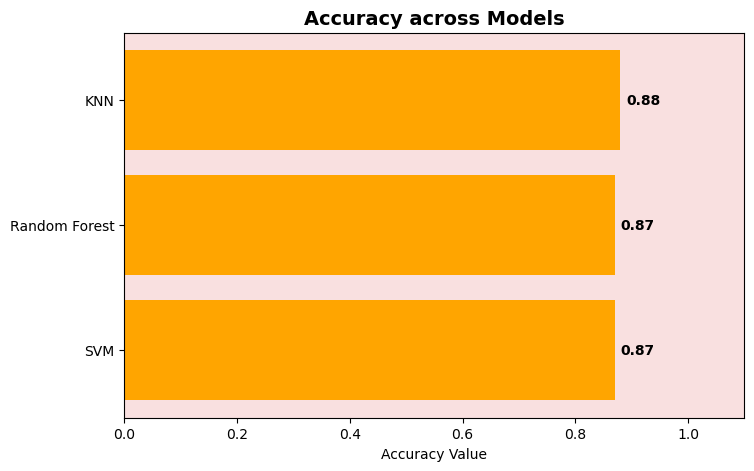

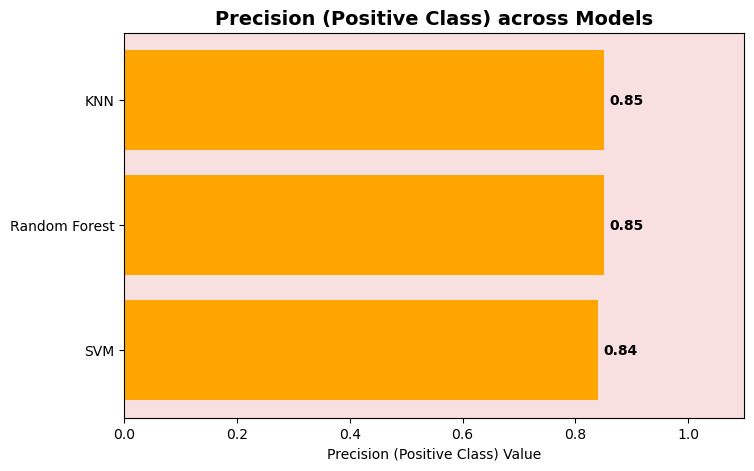

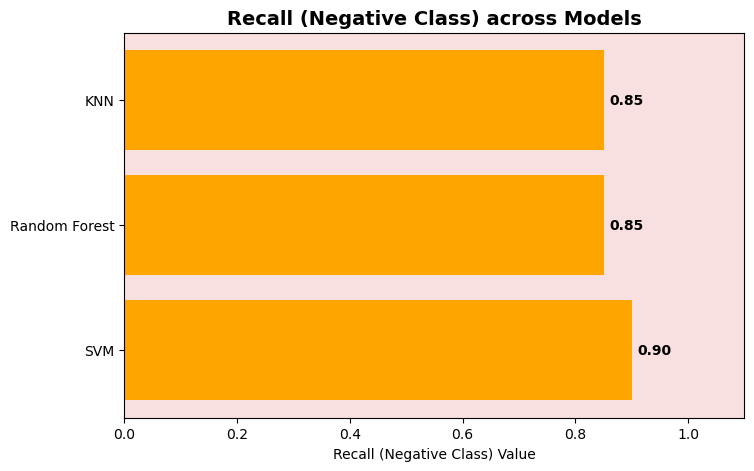

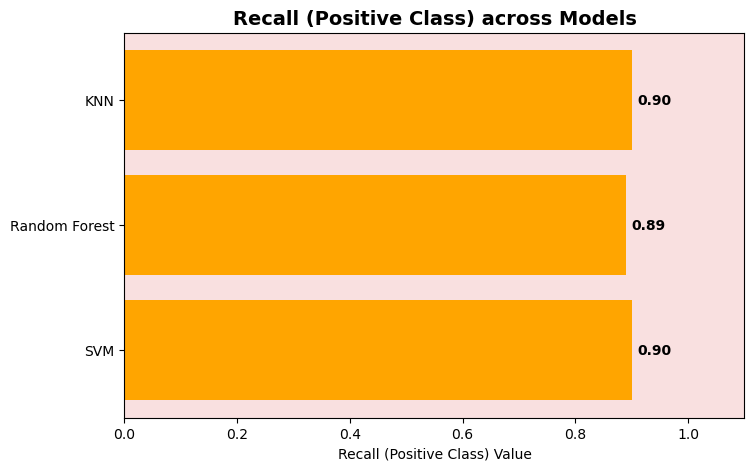

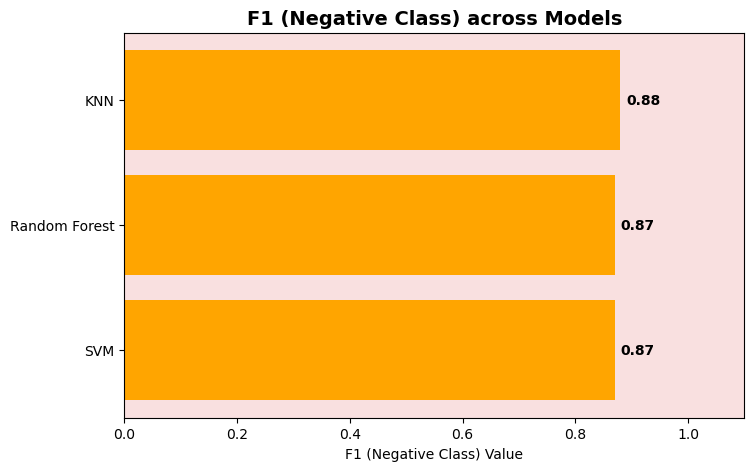

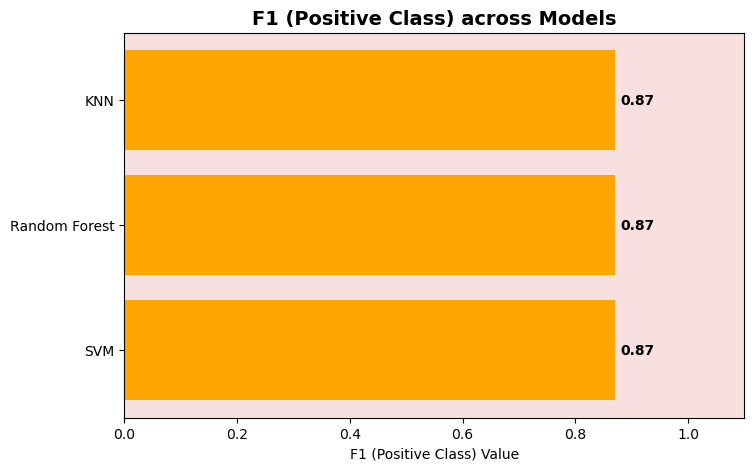

In [52]:
import matplotlib.pyplot as plt

# Fixed model order (new)
models = ["SVM", "Random Forest", "KNN"]

# Extracted metrics from classification reports (reordered to match new sequence)
accuracy = [0.87, 0.8705, 0.88]  
precision_pos = [0.84, 0.85, 0.85]   # Positive class = 1
recall_neg = [0.90, 0.85, 0.85]      # Negative class = 0
recall_pos = [0.90, 0.89, 0.90]      # Positive class = 1
f1_neg = [0.87, 0.87, 0.88]          # Negative class = 0
f1_pos = [0.87, 0.87, 0.87]          # Positive class = 1

# Dictionary of metrics
metrics = {
    "Accuracy across Models": accuracy,
    "Precision (Positive Class) across Models": precision_pos,
    "Recall (Negative Class) across Models": recall_neg,
    "Recall (Positive Class) across Models": recall_pos,
    "F1 (Negative Class) across Models": f1_neg,
    "F1 (Positive Class) across Models": f1_pos,
}

def plot_metric(title, values, models):
    plt.figure(figsize=(8, 5))
    vals = [v if v is not None else 0 for v in values]  # Replace None with 0 for plotting
    bars = plt.barh(models, vals, color="orange")

    plt.xlabel(title.split(" across")[0] + " Value")
    plt.title(title, fontsize=14, weight="bold")
    plt.gca().set_facecolor("#f9e0e0")

    # Add values on bars
    for bar, val, orig in zip(bars, vals, values):
        if orig is not None:
            plt.text(val + 0.01, bar.get_y() + bar.get_height()/2, f"{orig:.2f}",
                     va='center', fontsize=10, fontweight="bold")
        else:
            plt.text(0.01, bar.get_y() + bar.get_height()/2, "N/A",
                     va='center', fontsize=10, fontweight="bold", color="red")

    plt.xlim(0, 1.1)
    plt.show()

# Generate all charts
for title, values in metrics.items():
    plot_metric(title, values, models)
